# Load Ardupilot .bin log files

## mainly for IMU, flight is stationary



In [1]:
%matplotlib inline

In [2]:
from ardupilot_log_reader.reader import Ardupilot
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# import utm
# import math

from numpy.random import RandomState

# for date time management

import matplotlib.dates as mdates
import datetime as dt

In [3]:
HOME = os.getenv("HOME")
PATH2FILES = f'.'
PATH2FILES = f'{HOME}/Data/Drones/Flight_Logs/imu_log/'
# PATH2FILES = f'{HOME}/pCloudDrive/ITRI/Drones_UAV/FlightLogs/'
# LOGNAME = '2024-07-18 15-26-17.bin' # dynamic flight
LOGNAME = 'stationary.bin'
FULLNAME = f'{PATH2FILES}/{LOGNAME}'

In [4]:
# parser = Ardupilot.parse(FULLNAME,types=['XKF1','XKF2','GPS','VISP', 'VISV', 'NOT_A_MESSAGE']) # adding a type not present in the log don't raise an error
# parser = Ardupilot.parse(FULLNAME,types=['XKF1','XKF2','GPS','VISP','MAG','IMU','XKY0','MODE'])
parser = Ardupilot.parse(FULLNAME,types=['XKF1','XKF2','GPS','VISP','MAG','IMU','XKY0','MODE','ATT'])

In [62]:
# parse another log
LOGNAME = 'vins_250_loiter_test_visp.bin'
FULLNAME = f'{PATH2FILES}/{LOGNAME}'
parser2 = Ardupilot.parse(FULLNAME,types=['XKF1','XKF2','GPS','VISP','MAG','IMU','XKY0','MODE','ATT'])

In [6]:
mydf = parser.dfs['PARM']

In [63]:
mydf2 = parser2.dfs['PARM']

In [7]:
print(mydf[mydf['Name'].str.contains('IMU')])

     timestamp   TimeUS          Name  Value  Default
566   6.219289  6219289  EK3_IMU_MASK    3.0      3.0


In [8]:
# mydf_visp = parser.dfs['VISP'] # no VISP this time
mydf_mag = parser.dfs['MAG']
mydf_imu = parser.dfs['IMU']

In [65]:
mydf2_imu = parser2.dfs['IMU']

### IMU log analysis

#### Static situation, drone left on the table, not moving, no motor on.

In [19]:
accx,accy,accz = mydf_imu['AccX'].to_numpy(), mydf_imu['AccY'].to_numpy(), mydf_imu['AccZ'].to_numpy()
# seems that accx contains data from 2 accnetometer, 
# we take one every other elements
# accx1,accy1,accz1 = accx[0::2],accy[0::2],accz[0::2]
accx1,accy1,accz1 = accx[0::2].copy(),accy[0::2].copy(),accz[0::2].copy()
# accx2,accy2,accz2 = accx[1::2],accy[1::2],accz[1::2] 


In [20]:
len(accx1)
# get average gravity
gravity = np.mean(accz1)
print(gravity)
# remove gracity from acc z
accz1 = accz1 - gravity

-9.802532682830003


In [21]:
# get the average acceleration
accm1 = np.sqrt(accx1*accx1+accy1*accy1+accz1*accz1)

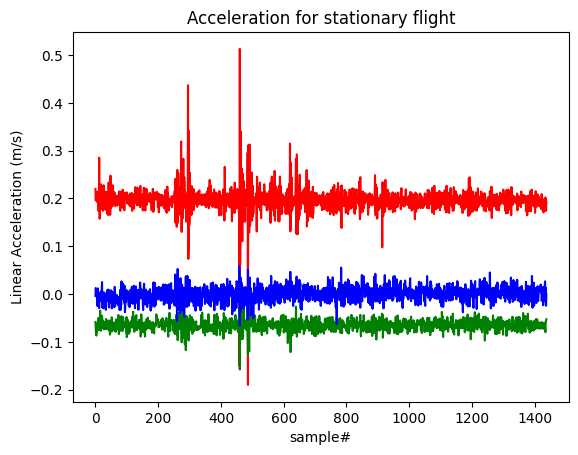

In [44]:
fig,ax = plt.subplots(1)
ax.plot(accx1,'r')
ax.plot(accy1,'g')
ax.plot(accz1,'b')
# ax.plot(accm1,'k.')
ax.set_title('Acceleration, idle on desk')
ax.set_xlabel('sample#')
ax.set_ylabel('Linear Acceleration (m/s)')
# plt.savefig("acc_from_log_idleondesk.png", format='png')
# plt.savefig("magx_from_log_with_train_zoomin.png", format='png')
plt.show()

In [36]:
dt = 1/25

In [51]:
# now check the velocity and position
time = np.arange(0,len(accm1))*dt
velmag = np.cumsum(accm1)*dt
velmag_x = np.cumsum(accx1)*dt
velmag_y = np.cumsum(accy1)*dt
velmag_z = np.cumsum(accz1)*dt
posmag = np.cumsum(velmag)*dt
posmag_x = np.cumsum(velmag_x)*dt
posmag_y = np.cumsum(velmag_y)*dt
posmag_z = np.cumsum(velmag_z)*dt

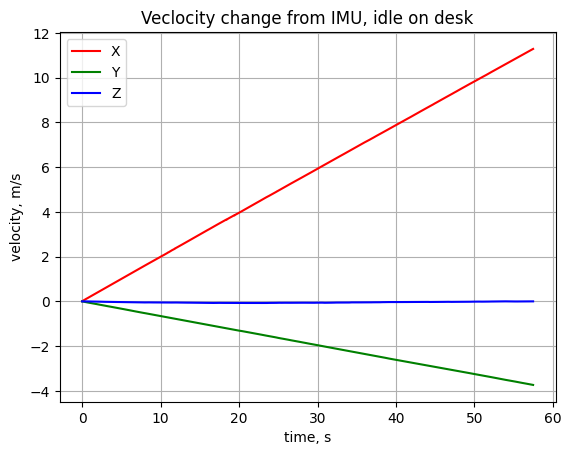

In [70]:
fig,ax = plt.subplots(1)
ax.plot(time,velmag_x,'r',label="X")
ax.plot(time,velmag_y,'g',label="Y")
ax.plot(time,velmag_z,'b',label="Z")
ax.set_title('Veclocity change from IMU, idle on desk')
ax.set_ylabel('velocity, m/s')
ax.set_xlabel('time, s')
ax.grid()
ax.legend()

# plt.savefig("velocity_idleOndesk.png", format='png')

plt.show()


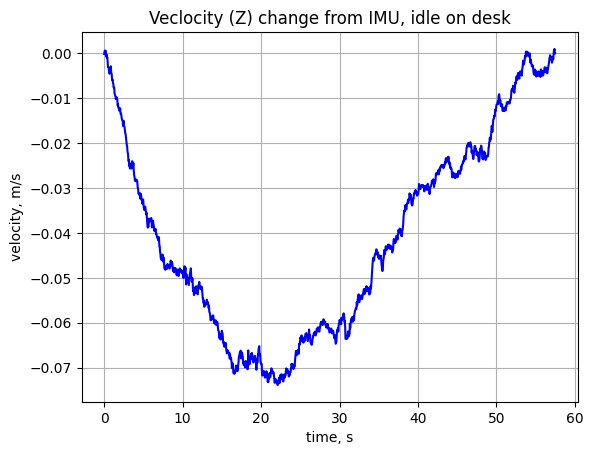

In [71]:
fig,ax = plt.subplots(1)
# ax.plot(time,velmag_x,'r')
# ax.plot(time,velmag_y,'g')
ax.plot(time,velmag_z,'b')
ax.set_title('Veclocity (Z) change from IMU, idle on desk')
ax.set_ylabel('velocity, m/s')
ax.set_xlabel('time, s')
ax.grid()
# plt.savefig("velocity_z_only_idle.png", format='png')

plt.show()


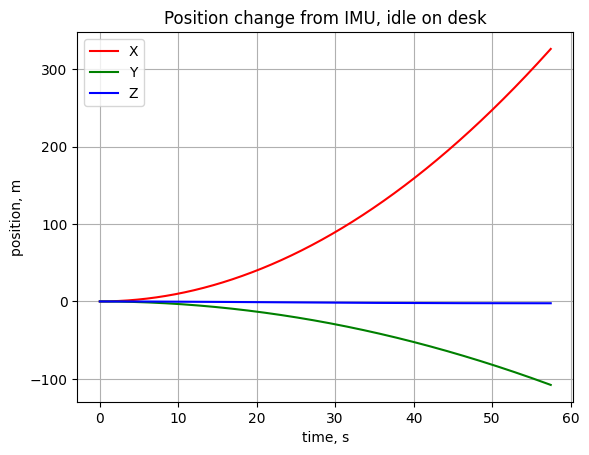

In [72]:
fig,ax = plt.subplots(1)
ax.plot(time,posmag_x,'r',label="X")
ax.plot(time,posmag_y,'g',label="Y")
ax.plot(time,posmag_z,'b',label="Z")
ax.set_title('Position change from IMU, idle on desk')
ax.set_ylabel('position, m')
ax.set_xlabel('time, s')
ax.legend()
ax.grid()

plt.savefig("position_from_log_stationary.png", format='png')

plt.show()


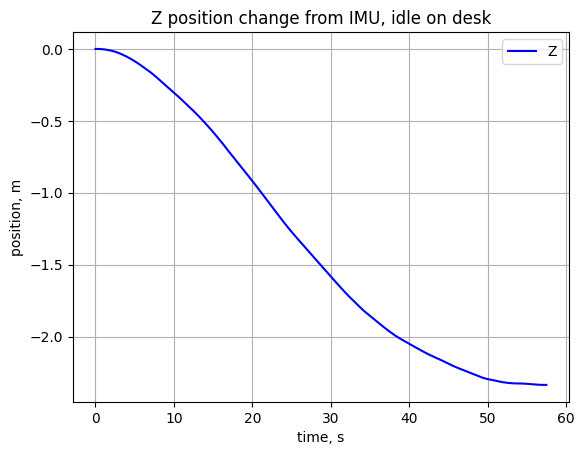

In [73]:
fig,ax = plt.subplots(1)
# ax.plot(time,posmag_x,'r',label="X")
# ax.plot(time,posmag_y,'g',label="Y")
ax.plot(time,posmag_z,'b',label="Z")
ax.set_title('Z position change from IMU, idle on desk')
ax.set_ylabel('position, m')
ax.set_xlabel('time, s')
ax.legend()
ax.grid()

# plt.savefig("position_Z_log_idle.png", format='png')

plt.show()


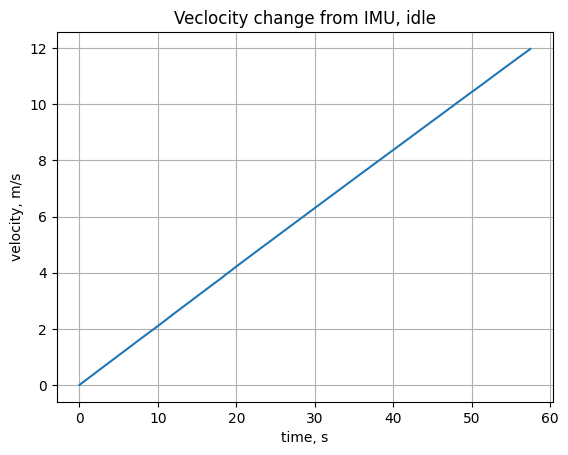

In [74]:
fig,ax = plt.subplots(1)
ax.plot(time,velmag)
ax.set_title('Veclocity change from IMU, idle')
ax.set_ylabel('velocity, m/s')
ax.set_xlabel('time, s')
ax.grid()
plt.show()


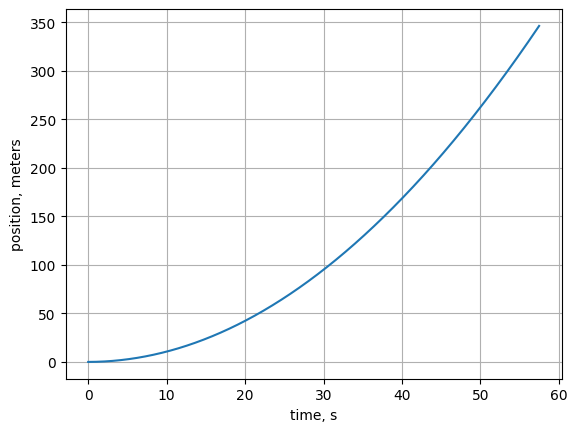

In [45]:
fig,ax = plt.subplots(1)
ax.plot(time,posmag)
ax.set_ylabel('position, meters')
ax.set_xlabel('time, s')
ax.grid()

plt.show()

### IMU log analysis

#### Loiter mode, with VINS

In [66]:
accx,accy,accz = mydf2_imu['AccX'].to_numpy(), mydf2_imu['AccY'].to_numpy(), mydf2_imu['AccZ'].to_numpy()
# seems that accx contains data from 2 accnetometer, 
# we take one every other elements
# accx1,accy1,accz1 = accx[0::2],accy[0::2],accz[0::2]
accx1,accy1,accz1 = accx[0::2].copy(),accy[0::2].copy(),accz[0::2].copy()
# accx2,accy2,accz2 = accx[1::2],accy[1::2],accz[1::2] 


In [67]:
len(accx1)
# get average gravity
gravity = np.mean(accz1)
print(gravity)
# remove gracity from acc z
accz1 = accz1 - gravity

-9.786564533914406


In [68]:
# get the average acceleration
accm1 = np.sqrt(accx1*accx1+accy1*accy1+accz1*accz1)

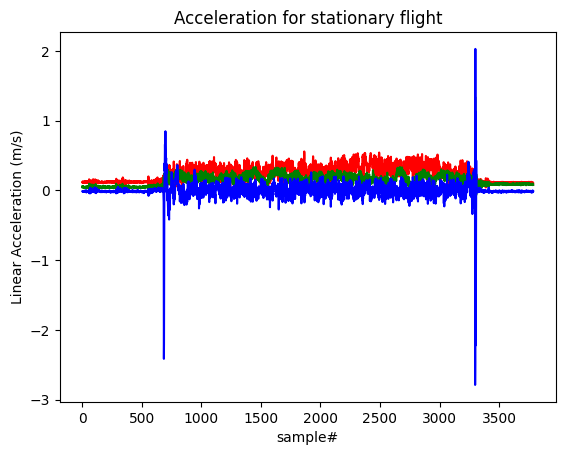

In [69]:
fig,ax = plt.subplots(1)
ax.plot(accx1,'r')
ax.plot(accy1,'g')
ax.plot(accz1,'b')
# ax.plot(accm1,'k.')
ax.set_title('Acceleration for stationary flight')
ax.set_xlabel('sample#')
ax.set_ylabel('Linear Acceleration (m/s)')
# plt.savefig("acc_from_log_stationary.png", format='png')
# plt.savefig("magx_from_log_with_train_zoomin.png", format='png')
plt.show()

In [77]:
dt = 1/25
samprange = np.arange((1000,3000))

TypeError: arange: scalar arguments expected instead of a tuple.

In [81]:
# now check the velocity and position
time = np.arange(0,len(accm1[1000:3000]))*dt
velmag = np.cumsum(accm1[1000:3000])*dt
velmag_x = np.cumsum(accx1[1000:3000])*dt
velmag_y = np.cumsum(accy1[1000:3000])*dt
velmag_z = np.cumsum(accz1[1000:3000])*dt
posmag = np.cumsum(velmag)*dt
posmag_x = np.cumsum(velmag_x)*dt
posmag_y = np.cumsum(velmag_y)*dt
posmag_z = np.cumsum(velmag_z)*dt

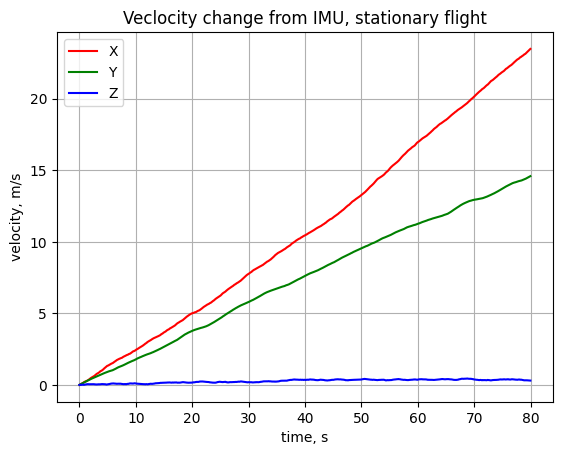

In [82]:
fig,ax = plt.subplots(1)
ax.plot(time,velmag_x,'r',label="X")
ax.plot(time,velmag_y,'g',label="Y")
ax.plot(time,velmag_z,'b',label="Z")
ax.set_title('Veclocity change from IMU, stationary flight')
ax.set_ylabel('velocity, m/s')
ax.set_xlabel('time, s')
ax.grid()
ax.legend()

plt.savefig("velocity_from_log_stationary.png", format='png')

plt.show()


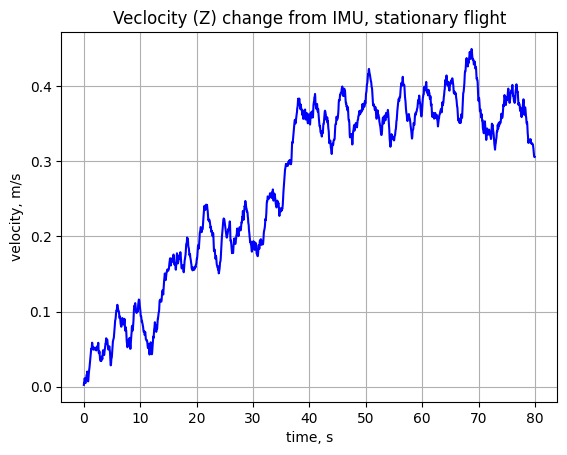

In [83]:
fig,ax = plt.subplots(1)
# ax.plot(time,velmag_x,'r')
# ax.plot(time,velmag_y,'g')
ax.plot(time,velmag_z,'b')
ax.set_title('Veclocity (Z) change from IMU, stationary flight')
ax.set_ylabel('velocity, m/s')
ax.set_xlabel('time, s')
ax.grid()
plt.savefig("velocity_z_only_log_stationary.png", format='png')

plt.show()


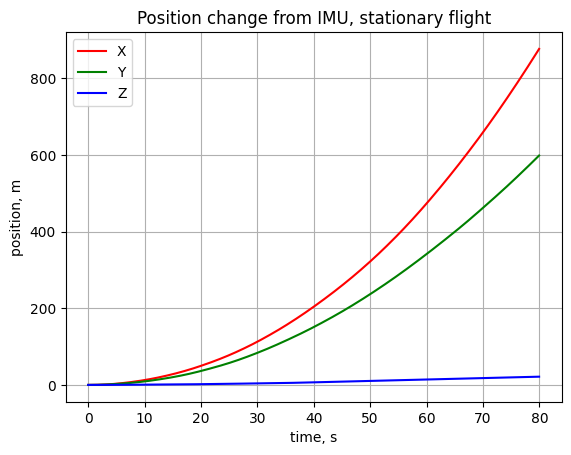

In [84]:
fig,ax = plt.subplots(1)
ax.plot(time,posmag_x,'r',label="X")
ax.plot(time,posmag_y,'g',label="Y")
ax.plot(time,posmag_z,'b',label="Z")
ax.set_title('Position change from IMU, stationary flight')
ax.set_ylabel('position, m')
ax.set_xlabel('time, s')
ax.legend()
ax.grid()

plt.savefig("position_from_log_stationary.png", format='png')

plt.show()


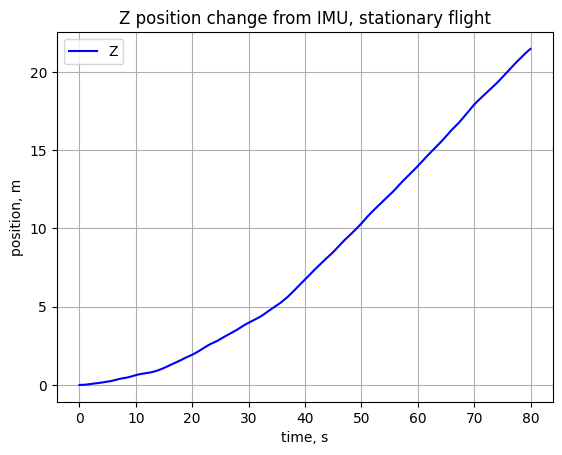

In [85]:
fig,ax = plt.subplots(1)
# ax.plot(time,posmag_x,'r',label="X")
# ax.plot(time,posmag_y,'g',label="Y")
ax.plot(time,posmag_z,'b',label="Z")
ax.set_title('Z position change from IMU, stationary flight')
ax.set_ylabel('position, m')
ax.set_xlabel('time, s')
ax.legend()
ax.grid()

plt.savefig("position_Z_log_stationary.png", format='png')

plt.show()


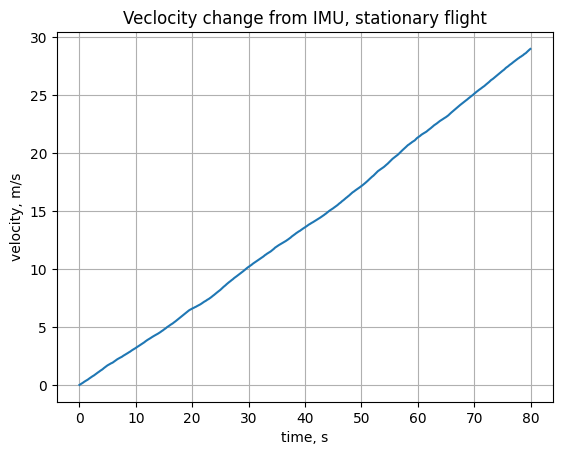

In [86]:
fig,ax = plt.subplots(1)
ax.plot(time,velmag)
ax.set_title('Veclocity change from IMU, stationary flight')
ax.set_ylabel('velocity, m/s')
ax.set_xlabel('time, s')
ax.grid()
plt.show()


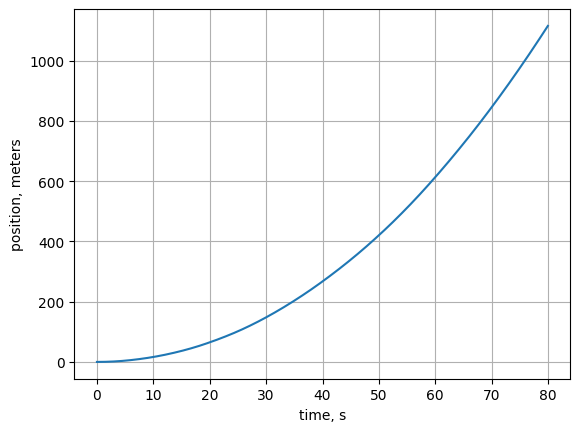

In [87]:
fig,ax = plt.subplots(1)
ax.plot(time,posmag)
ax.set_ylabel('position, meters')
ax.set_xlabel('time, s')
ax.grid()

plt.show()